# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:https://www.kaggle.com/datasets/amirmahdiabbootalebi/salary-by-job-title-and-country/data

Import the necessary libraries and create your dataframe(s).


I chose to analyze 'Salary_Data_Based_country_and_race' csv file from the dataset. This dataset provides a comprehensive collection of salary information from various industries and regions across the globe.

DATASET COLUMN DESCRIPTIONS:

1. Unnamed Column: 0
2. Age - Employee's age (in years)
3. Gender - Employee's gender (Male, Female, Other)
4. Education level - Highest level of education achieved (High School, Bachelor's, Master's, PhD)
5. Job Title - Employee's job role
6. Years of Experience - Total years of professional experience
7. Salary - Annual salary (in US Dollar)
8. Country - Country where the employee works
9. Race - Employee's race or ethnicity

In [1]:
# Importing the appropriate libraries with aliases

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
# Created dataframe 'df' from "Salary_Data_Based_country_and_race" csv

df = pd.read_csv("Salary_Data_Based_country_and_race.csv")
df

# The first column (Unnamed: 0) appears to be an index column. There are 6704 rows and 9 columns.

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [3]:
# Get the original shape of the dataframe. 
df.shape

# The dataframe has 6704 rows and 9 columns.

(6704, 9)

In [4]:
# Exploring Column names, non-null counts, and Datatypes.
df.info()

# Column (Unnamed: 0) is a typical column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [5]:
# Checking for duplicate values. There are no duplicates.

df.duplicated().sum()

np.int64(0)

In [6]:
# # Dropping  Column 'Unnamed: 0'
# df = df.drop(columns = ['Unnamed: 0'])
# df.reset_index
# df

In [7]:
# Checking for duplicate values.
# df.duplicated().sum()

# Dropping the Unnamed: 0 column is resulting in 1535 duplicate values. 
# It seems to be an automatically generated index (Pandas generated identifier) with sequential numbering as unique values.
# These are used to identify each row when no primary key is available in the dataframe. Therefore, I decided to keep the column.

In [8]:
# Renaming column 'Unnamed: 0' to 'Index'

df = df.rename(columns={'Unnamed: 0': 'Index'})

In [9]:
# Checking Column names after renaming column "Unnamed: 0' as 'Index'
df.columns

Index(['Index', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'],
      dtype='object')

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [10]:
# Getting the count of null values per column
df.isna().sum()

Index                  0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [11]:
# Using conditional filtering combined with the isna() function. Displays the rows where 'Age' is NaN
df[pd.isna(df['Age'])]

# Row 172 and 260 have NaN values

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White


In [12]:
# Using conditional filtering combined with the isna() function. Displays the rows where 'Gender' is NaN
df[pd.isna(df['Gender'])]

# Row 172 and 260 have NaN values

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White


In [13]:
# Using conditional filtering combined with the isna() function. Displays the rows where 'Education Level' is NaN
df[pd.isna(df['Education Level'])]

# Row 172, 260 and 2011 have NaN values

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
2011,2011,27.0,Male,NaN,Developer,7.0,100000.0,UK,White


In [14]:
# Using conditional filtering combined with the isna() function. Displays the rows where 'Job Title' is NaN
df[pd.isna(df['Job Title'])]

# Row 172 and 260 have NaN values

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White


In [15]:
# Using conditional filtering combined with the isna() function. Displays the rows where 'Years of Experience' is NaN
df[pd.isna(df['Years of Experience'])]

# Row 172, 260 and 5247 have NaN values

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
5247,5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,USA,White


In [16]:
# Using conditional filtering combined with the isna() function. Displays the rows where 'Salary' is NaN
df[pd.isna(df['Salary'])]

# Row 172, 260, 3136, 5247 and 6455 have NaN values

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
3136,3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN,Canada,White
5247,5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,USA,White
6455,6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN,Canada,White


In [17]:
# Get the original shape of the dataframe. 
df.shape

# The dataframe has 6704 rows and 9 columns

(6704, 9)

In [18]:
# Rows with index 172 and 260 has missing values in all the columns except 'Country' and 'Race'.
# These 2 rows make up only 0.03% of this dataset, which is a negligible percent of total records.
# Therefore, dropping these rows seems ok for maintaining the quality of the analysis.

# Drop rows where the index is in the list
salary_df = df.drop([172, 260], axis=0)

In [19]:
# After dropping rows with index 172 and 260, the dataframe has 6702 rows and 9 columns.
salary_df.shape

(6702, 9)

In [20]:
# Display the updated count of null values
salary_df.isna().sum()

Index                  0
Age                    0
Gender                 0
Education Level        1
Job Title              0
Years of Experience    1
Salary                 3
Country                0
Race                   0
dtype: int64

In [21]:
# Using conditional filtering combined with the isna() function. Displays the rows where 'Education Level' is NaN
salary_df[pd.isna(salary_df['Education Level'])]

# Row 2011 have NaN values

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
2011,2011,27.0,Male,NaN,Developer,7.0,100000.0,UK,White


In [22]:
# Using conditional filtering combined with the isna() function. Displays the rows where 'Years of Experience' is NaN
salary_df[pd.isna(salary_df['Years of Experience'])]

# Row 5247 have NaN values

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
5247,5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,USA,White


In [23]:
# Using conditional filtering combined with the isna() function. Displays the rows where 'Salary' is NaN
salary_df[pd.isna(salary_df['Salary'])]

# Rows 3136, 5247 and 6455 have NaN values

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
3136,3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN,Canada,White
5247,5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,USA,White
6455,6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN,Canada,White


In [24]:
# Getting Descriptive statistics of columns - Age, Years of Experience and Salary

salary_df.describe()

,Index,Age,Years of Experience,Salary
count,6702.000000,6702.000000,6701.000000,6699.000000
mean,3352.435691,33.620859,8.094687,115326.964771
std,1934.952777,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1677.250000,28.000000,3.000000,70000.000000
50%,3352.500000,32.000000,7.000000,115000.000000
75%,5027.750000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [25]:
# I decided that the best course of action is to populate missing value in column 'Years of Experience' with the median value of 
# column 'Years of Experience' (since this dataset is skewed). I am doing this because I want to retain the other column data for insights 
# related to Salary, Gender, Age, Education Level, Country and Race. I know that adding median value to the Years of Experience will not 
# impact the total avg, min or max value. The code above this cell (describe function) shows the median (50%) for Years of Experience 
# in the dataframe is 7.0 years. I will replace the missing value in index 5247, column 'Years of experience' with 7.0

# Use .loc[] to fill missing value in index 5247 and column'Years of Experience' with mean
salary_df.loc[5247, 'Years of Experience'] = 7.0

In [26]:
# Checking if the missing or NaN value has been replaced with 7.0 in row with index 5247 in column 'Years of Experience' 
salary_df.loc[5247]

Index                               5247
Age                                 26.0
Gender                            Female
Education Level        Bachelor's Degree
Job Title                       Social M
Years of Experience                  7.0
Salary                               NaN
Country                              USA
Race                               White
Name: 5247, dtype: object

In [27]:
# Display the updated count of null values
salary_df.isna().sum()

Index                  0
Age                    0
Gender                 0
Education Level        1
Job Title              0
Years of Experience    0
Salary                 3
Country                0
Race                   0
dtype: int64

In [28]:
# I decided that the best course of action is to populate missing value in column 'Education Level' with the mode. 
# I am doing this because I want to retain the other column data for insights related to Salary, Gender, Age,etc.
# Since there is only one single missing value, filling with mode will not significantly impact the overall analysis. 
# Calculate the mode of the column 'Education Level'

salary_df['Education Level'].mode()

# The mode of the column 'Education Level' is Bachelor's Degree'.

0    Bachelor's Degree
Name: Education Level, dtype: object

In [29]:
# # Use .loc[] to fill missing value in index 2011 and column'Education Level' with mode - Bachelor's Degree
salary_df.loc[2011, 'Education Level'] = "Bachelor's Degree"

In [30]:
# Checking if the missing or NaN value has been replaced with 'Bachelor's Degree' in row with index 2011 in column 'Education Level' 
salary_df.loc[2011]

Index                               2011
Age                                 27.0
Gender                              Male
Education Level        Bachelor's Degree
Job Title                      Developer
Years of Experience                  7.0
Salary                          100000.0
Country                               UK
Race                               White
Name: 2011, dtype: object

In [31]:
# Display the updated count of null values
salary_df.isna().sum()

Index                  0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 3
Country                0
Race                   0
dtype: int64

In [32]:
salary_df['Salary'].describe()

count      6699.000000
mean     115326.964771
std       52786.183911
min         350.000000
25%       70000.000000
50%      115000.000000
75%      160000.000000
max      250000.000000
Name: Salary, dtype: float64

In [33]:
# I decided that the best course of action is to populate missing value in column 'Salary' with the median value since the data is skewed.
# I am doing this because I want to retain the other column data for insights related to Salary, Gender, Age, Education Level, Country & Race. 
# The code above this cell (describe function) shows the median Salary in the dataframe is 115000.00 
# I will replace the missing value in index 5247,3136 and 6455 column 'Salary' with 115000.00

# Use .loc[] to fill missing value in index 5247, 3136, 6455 and column'Years of Experience' with median
salary_df.loc[[5247, 3136, 6455],'Salary'] = 115000.0

In [34]:
# Checking if the missing or NaN values in the Salary column have been replaced 
salary_df.loc[[5247, 3136, 6455]]

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
5247,5247,26.0,Female,Bachelor's Degree,Social M,7.0,115000.0,USA,White
3136,3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,115000.0,Canada,White
6455,6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,115000.0,Canada,White


In [35]:
# Display the updated count of null values. There are no null values in the dataset
salary_df.isna().sum()

Index                  0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [36]:
# Checking for duplicates

salary_df.duplicated().sum()

np.int64(0)

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [37]:
# Getting Descriptive statistics of columns - Age, Years of Experience and Salary

salary_df.describe()

# I noticed that the maximum salary in the dataset is USD 250000 and the minimum salary is USD 350 (which seems unrealistic)

,Index,Age,Years of Experience,Salary
count,6702.000000,6702.000000,6702.000000,6702.000000
mean,3352.435691,33.620859,8.094524,115326.818412
std,1934.952777,7.614633,6.058566,52774.367002
min,0.000000,21.000000,0.000000,350.000000
25%,1677.250000,28.000000,3.000000,70000.000000
50%,3352.500000,32.000000,7.000000,115000.000000
75%,5027.750000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [38]:
# Checking the rows with salary greater than USD 225000

salary_df[salary_df['Salary'] > 225000]

# There are 12 employees 

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
30,30,50.0,Male,Bachelor's,CEO,25.0,250000.0,Canada,Asian
83,83,52.0,Male,PhD,Chief Technology Officer,24.0,250000.0,Canada,Black
4276,4276,51.0,Male,PhD,Data Scientist,24.0,240000.0,Canada,Black
4291,4291,51.0,Male,PhD,Data Scientist,24.0,240000.0,UK,Welsh
4306,4306,51.0,Male,PhD,Data Scientist,24.0,240000.0,China,Korean
4321,4321,51.0,Male,PhD,Data Scientist,24.0,240000.0,China,Chinese
4336,4336,51.0,Male,PhD,Data Scientist,24.0,240000.0,USA,White
4351,4351,51.0,Male,PhD,Data Scientist,24.0,240000.0,Canada,Black
4366,4366,51.0,Male,PhD,Data Scientist,24.0,240000.0,Canada,White
4381,4381,51.0,Male,PhD,Data Scientist,24.0,240000.0,Canada,Asian


In [39]:
# Checking the rows with salary less than USD 25000.

salary_df[salary_df['Salary'] < 25000]

# There are 4 employees with salary less than USD 600

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
259,259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0,USA,Hispanic
1890,1890,25.0,Female,Bachelor's Degree,Front end Developer,1.0,550.0,UK,Mixed
2654,2654,23.0,Male,PhD,Software Engineer Manager,1.0,579.0,UK,Mixed
4633,4633,31.0,Female,Bachelor's Degree,Junior HR Coordinator,4.0,500.0,USA,Asian


<Axes: xlabel='Salary'>

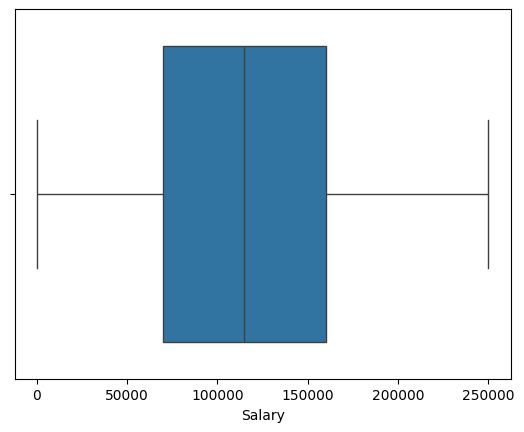

In [40]:
# Creating a Boxplot of the Salary column to give a visual clue of the potential outliers.
sns.boxplot(x=salary_df['Salary'])

# There are no potential outliers

In [41]:
# Finding outliers in 'Salary' column of the dataset using the IQR method
# Calculating Q1(q1), Q3(q3) and IQR (iqr)

q1 = salary_df['Salary'].quantile(0.25)
q3 = salary_df['Salary'].quantile(0.75)

iqr = q3-q1

# Print the results
print("25th percentile (q1):", q1)
print("75th percentile (q3):", q3)
print("Interquartile Range (iqr):", iqr)

25th percentile (q1): 70000.0
75th percentile (q3): 160000.0
Interquartile Range (iqr): 90000.0


In [42]:
# Calculating lower bound threshold
lower_bound_salary = q1-1.5 * iqr
lower_bound_salary

# The lower bound threshold is -65000 US Dollars

np.float64(-65000.0)

In [43]:
# Checking the rows with salary less than USD 25000.

salary_df[salary_df['Salary'] < 25000]

# There are 4 employees with salary less than USD 600

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
259,259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0,USA,Hispanic
1890,1890,25.0,Female,Bachelor's Degree,Front end Developer,1.0,550.0,UK,Mixed
2654,2654,23.0,Male,PhD,Software Engineer Manager,1.0,579.0,UK,Mixed
4633,4633,31.0,Female,Bachelor's Degree,Junior HR Coordinator,4.0,500.0,USA,Asian


In [44]:
# APPROACH 1
# There are 4 employees with salary less than USD 25000. This seems unrealsitic and could be possible outliers that are resulting in negative
# lower bound. Therefore, I decided to populate missing value in column 'Salary' with the median value since the data is skewed.
# I want to retain the other column data for insights related to Salary, Gender, Age, Education Level, Country & Race. 
# I will replace the values for Salary in index 259,1890, 2654 and 4633 with 115000.0

# Use .loc[] to fill missing value in index 259, 1890, 2654, 4633 and column'Salary' with median value 
# salary_df.loc[[259, 1890, 2654, 4633],'Salary'] = 115000.0

In [45]:
# Checking if the values in the Salary column have been replaced 
# salary_df.loc[[259, 1890, 2654, 4633]]

In [46]:
# Finding outliers in 'Salary' column of the dataset using the IQR method
# Calculating Q1(q1), Q3(q3) and IQR (iqr)

# q1 = salary_df['Salary'].quantile(0.25)
# q3 = salary_df['Salary'].quantile(0.75)

# iqr = q3-q1

# Print the results
# print("25th percentile (q1):", q1)
# print("75th percentile (q3):", q3)
# print("Interquartile Range (iqr):", iqr)

In [47]:
# # Calculating lower bound threshold
# lower_bound_salary = q1-1.5 * iqr
# lower_bound_salary

# # The lower bound threshold is -65000 US Dollars. THIS SHOWS NO CHANGE IN LOWER BOUND THRESHHOLD AFTER REPLACING LOW SALARY VALUES.

In [48]:
# Display the updated count of null values
salary_df.isna().sum()

Index                  0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [49]:
# Checking number of rows and columns
salary_df.shape

(6702, 9)

In [50]:
# APPROACH 2
# Annual Salary of amount less than US Dollar 600 seems unrealistic. I have decided to drop these 4 rows.

# Rows with index 259, 1890, 2654 and 4633 have annual salary less than USD 600 which seems unrealsitic considering their Education Level 
# and Job Title. These 4 rows make up only 0.05% of this dataset, which is a negligible percent of total records.
# Therefore, dropping these rows seems ok for maintaining the quality of the analysis.

# Drop rows where the index is in the list
salary_df = salary_df.drop([259, 1890, 2654, 4633], axis=0)

In [51]:
# Display the updated count of null values
salary_df.isna().sum()

Index                  0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [52]:
# Checking number of rows and columns after dropping 4 rows

salary_df.shape

# There are 6698 rows and 9 columns

(6698, 9)

In [53]:
# Finding outliers in 'Salary' column of the dataset using the IQR method
# Calculating Q1(q1), Q3(q3) and IQR (iqr)

q1 = salary_df['Salary'].quantile(0.25)
q3 = salary_df['Salary'].quantile(0.75)

iqr = q3-q1

# Print the results
print("25th percentile (q1):", q1)
print("75th percentile (q3):", q3)
print("Interquartile Range (iqr):", iqr)

25th percentile (q1): 70000.0
75th percentile (q3): 160000.0
Interquartile Range (iqr): 90000.0


In [54]:
# Calculating lower bound threshold
lower_bound_salary = q1-1.5 * iqr
lower_bound_salary

# The lower bound threshold is -65000 US Dollars. THIS SHOWS NO CHANGE IN LOWER BOUND THRESHHOLD AFTER DROPPING ROWS WITH SALARY VALUES
# LESS THAN USD 600.To maintain the quality of the analysis, I have decided to drop the 4 rows.
# Negative lower_bound_salary value of -65000 indicates that q3 minus q1 is large. This situation can happen if the spread of data above q3 
# is much larger than below q1 resulting in a wide range of typical values.

np.float64(-65000.0)

In [55]:
# Calculating upper bound threshold
upper_bound_salary = q3+1.5 * iqr
upper_bound_salary

# The upper bound threshold is 295000 US Dollars

np.float64(295000.0)

In [56]:
# Find the outliers where Salary is less than lower_bound or greater than upper_bound
outliers = salary_df[(salary_df['Salary'] < lower_bound_salary) | (salary_df['Salary'] > upper_bound_salary)]
outliers

# The output shows that there are no outliers in the 'Salary' column.

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race


In [57]:
# After dropping rows in the Salary column, the dataframe has 6698 rows and 9 columns.
salary_df.shape

(6698, 9)

<Axes: ylabel='Frequency'>

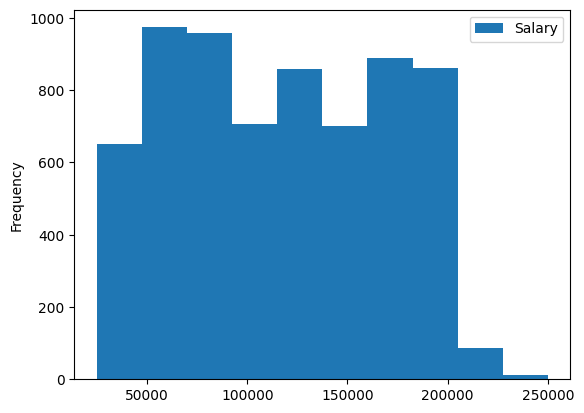

In [58]:
# Creating a Histogram. The Histogram has two peaks which shows two distinct salary groups within the dataset.

salary_df.plot.hist(column='Salary')

In [59]:
# Summary Statistics of the 'Age' column
salary_df['Age'].describe()

count    6698.000000
mean       33.624813
std         7.614794
min        21.000000
25%        28.000000
50%        32.000000
75%        38.000000
max        62.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

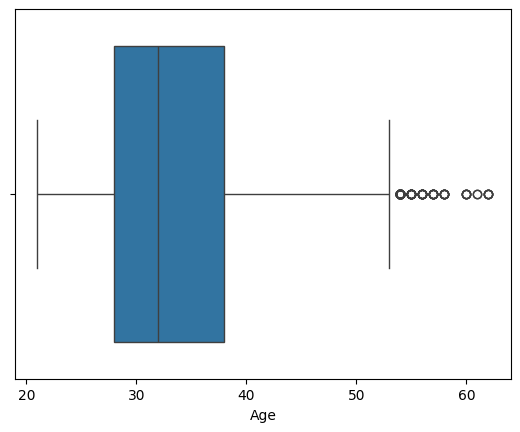

In [60]:
# Creating a Boxplot of the Age column to give a visual clue of the potential outliers.
sns.boxplot(x=salary_df['Age'])

In [61]:
# Finding outliers in 'Age' column of the dataset using the IQR method
# Calculating Q1(q1), Q3(q3) and IQR (iqr)
q1 = salary_df['Age'].quantile(0.25)
q3 = salary_df['Age'].quantile(0.75)

iqr = q3-q1
iqr

# The iqr is 10

np.float64(10.0)

In [62]:
# Calculating lower bound threshold
lower_bound_age = q1-1.5 * iqr
lower_bound_age

# The lower bound threshold for Age is 13 years

np.float64(13.0)

In [63]:
# Calculating upper bound threshold
upper_bound_age = q3+1.5 * iqr
upper_bound_age

# The upper bound threshold for Age is 53 years

np.float64(53.0)

In [64]:
# Find the outliers where Age is less than lower_bound or greater than upper_bound
outliers_age = salary_df[(salary_df['Age'] < lower_bound_age) | (salary_df['Age'] > upper_bound_age)]
outliers_age

# There are 123 rows with outliers (less than 13 years and more than 53 years) in the 'Age' column of the dataset

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
1211,1211,61.0,Male,PhD,Software Engineer Manager,20.0,200000.0,UK,Welsh
1223,1223,57.0,Male,PhD,Software Engineer Manager,18.0,195000.0,China,White
1225,1225,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0,UK,White
1236,1236,62.0,Male,PhD,Software Engineer Manager,20.0,200000.0,China,Korean
1240,1240,55.0,Male,PhD,Software Engineer Manager,17.0,190000.0,USA,African American
...,...,...,...,...,...,...,...,...,...
3058,3058,54.0,Male,Master's Degree,Senior Software Engineer,32.0,195270.0,Canada,Asian
3067,3067,54.0,Male,Bachelor's Degree,Full Stack Engineer,25.0,179756.0,UK,Mixed
3084,3084,54.0,Female,PhD,Software Engineer Manager,32.0,191510.0,China,Chinese
3104,3104,54.0,Male,PhD,Software Engineer Manager,30.0,184660.0,Australia,Australian


In [65]:
# Removing outliers from the 'Age' column in the dataframe salary_df. 

salary_df = salary_df.drop(outliers_age.index)

In [66]:
# Checking the number of rows and columns after dropping the outliers in the Age column.

salary_df.shape

# There are 6575 rows (6698 minus 123) and 9 columns

(6575, 9)

<Axes: ylabel='Frequency'>

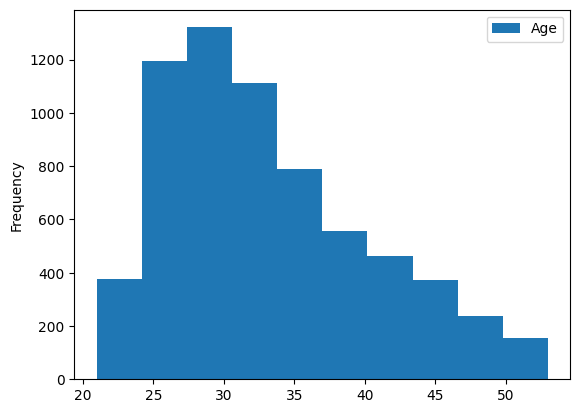

In [67]:
# Creating a Histogram. The Histogram is skewed to the right (positively skewed) and gives a visual clue that there are potential outliers 
# on the far right side. There is high frequency of employees with 25-30 years as the most common age group in the dataset.

salary_df.plot.hist(column='Age')

In [68]:
# Summary Statistics of the 'Years of Experience' column

salary_df['Years of Experience'].describe()

count    6575.000000
mean        7.823270
std         5.701006
min         0.000000
25%         3.000000
50%         7.000000
75%        12.000000
max        31.000000
Name: Years of Experience, dtype: float64

<Axes: xlabel='Years of Experience'>

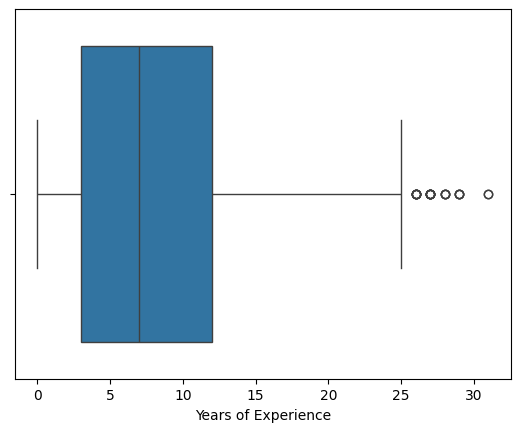

In [69]:
# Creating a Boxplot of the Years of Experience column to give a visual clue of the potential outliers.
sns.boxplot(x=salary_df['Years of Experience'])

In [70]:
# Finding outliers in 'Years of Experience' column of the dataset using the IQR method.
# Calculating Q1(q1), Q3(q3) and IQR (iqr)
q1 = salary_df['Years of Experience'].quantile(0.25)
q3 = salary_df['Years of Experience'].quantile(0.75)

iqr = q3-q1
iqr

# The iqr is 9.0 years

np.float64(9.0)

In [71]:
# Calculating lower bound threshold
lower_bound_experience = q1-1.5 * iqr
lower_bound_experience

# Lower bound threshold is -10.5 years. # Negative lower_bound_experience value of -10.5 years indicates that q3 minus q1 is large. 
# The minimum value for 'Years of Experience' is 0 years and maximum value is 31 years.
# This situation can happen if the spread of data above q3 is much larger than below q1 resulting in a wide range of typical values.

np.float64(-10.5)

In [72]:
# Calculating upper bound threshold
upper_bound_experience = q3+1.5 * iqr
upper_bound_experience

# Upper bound threshold is 25.5 years

np.float64(25.5)

In [73]:
# Find the outliers where Years of Experience is less than lower_bound or greater than upper_bound
outliers_experience = salary_df[(salary_df['Years of Experience'] < lower_bound_experience) | (salary_df['Years of Experience'] > upper_bound_experience)]
outliers_experience

# There are 25 rows with outliers (Less than -10.5 years and greater than 25.5 years) in the 'Years of Experience' column of the dataset

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
2378,2378,53.0,Other,High School,Senior Project Engineer,31.0,166109.0,Canada,White
2392,2392,52.0,Female,Master's Degree,Senior Software Engineer,28.0,186963.0,Australia,Australian
2458,2458,53.0,Other,High School,Senior Project Engineer,31.0,166109.0,China,White
2472,2472,52.0,Female,Master's Degree,Senior Software Engineer,28.0,186963.0,China,Korean
2557,2557,52.0,Female,PhD,Software Engineer Manager,29.0,194214.0,UK,White
2563,2563,52.0,Male,Master's Degree,Senior Software Engineer,26.0,184816.0,USA,Hispanic
2592,2592,52.0,Male,PhD,Software Engineer Manager,26.0,185462.0,Canada,Black
2612,2612,51.0,Male,Master's Degree,Senior Software Engineer,28.0,186610.0,Canada,White
2621,2621,51.0,Male,PhD,Software Engineer Manager,26.0,191159.0,China,White
2627,2627,52.0,Female,PhD,Software Engineer Manager,27.0,180958.0,Australia,Asian


In [74]:
# # Removing outliers from the 'Years of Experience' column in the dataframe df_cleaned1. Assigned variable name df_cleaned2 to the new 
# dataframe after dropping rows containing outliers in the Years of Experience column

salary_df = salary_df.drop(outliers_experience.index)

In [75]:
# Checking the number of rows and columns after dropping the outliers in the Years of Experience column.

salary_df.shape

# # There are 6550 rows (6575 minus 25) and 9 columns

(6550, 9)

<Axes: ylabel='Frequency'>

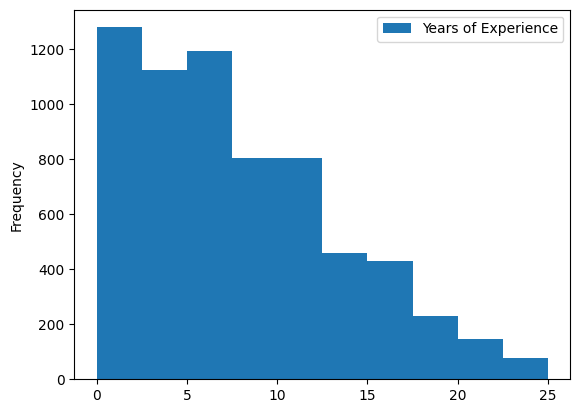

In [76]:
# Creating a Histogram. The Histogram is skewed to the right (positively skewed) and gives a visual clue that there are potential outliers
# on the far right side. There is high frequency of employees with 0-3 years of experience.

salary_df.plot.hist(column='Years of Experience')

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [77]:
# Checking for duplicate values or rows in the dataframe
salary_df.duplicated().sum()

# There are no duplicate values or rows in the dataframe

np.int64(0)

In [78]:
# The 'Unnamed: 0' column has been renamed as 'Index'.
# It seems to be an automatically generated index (Pandas generated identifier) with sequential numbering as unique values.
# These are used to identify each row when no primary key is available in the dataframe. Therefore, I decided to keep the column.

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [79]:
# (A) CONVERSION OF DATATYPES FOR COLUMNS - SALARY, AGE & YEARS OF EXPERIENCE
# All the values in the Salary column are whole numbers. Therefore, I would like to convert the values from object to integer data type.
# Most of the values in the 'Age' column are whole numbers 
# Most of the values in the 'Years of Experience' column are whole numbers. 

In [80]:
# Displaying first 10 rows of the dataframe df_cleaned2 (before converting data types from object to integer for 'Salary', 'Age' and 
# 'Years of Experience' columns.

salary_df.head(10)

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
5,5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0,USA,Hispanic
6,6,42.0,Female,Master's,Product Manager,12.0,120000.0,USA,Asian
7,7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0,China,Korean
8,8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0,China,Chinese
9,9,38.0,Male,PhD,Senior Scientist,10.0,110000.0,Australia,Australian


In [81]:
# Check datatypes of the columns in the dataset
salary_df.info()

# Note that columns 'Age', 'Years of Experience' and 'Salary' are datatype object

<class 'pandas.core.frame.DataFrame'>
Index: 6550 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Index                6550 non-null   int64  
 1   Age                  6550 non-null   float64
 2   Gender               6550 non-null   object 
 3   Education Level      6550 non-null   object 
 4   Job Title            6550 non-null   object 
 5   Years of Experience  6550 non-null   float64
 6   Salary               6550 non-null   float64
 7   Country              6550 non-null   object 
 8   Race                 6550 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 511.7+ KB


In [82]:
# Converting data type of Salary column from object to integer since all values are whole numbers.

salary_df['Salary'] = salary_df['Salary'].astype(int, errors='raise')

In [83]:
# Converting data type of Agey column from object to integer since all values are whole numbers.

salary_df['Age'] = salary_df['Age'].astype(int, errors='raise')

In [84]:
# Converting data type of Years of Experience column from object to integer since all values are whole numbers.

salary_df['Years of Experience'] = salary_df['Years of Experience'].astype(int, errors='raise')

In [85]:
# Checking conversion of datatype to integer for columns - Salary, Age and Years of Experience
# I also noticed that even though the dataframe has 6554 enteries after removing the outliers, the index is 0 to 6703. I will be resetting the 
# the index of the 'salary_df' dataframe after completing the cleaning process.

salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6550 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Index                6550 non-null   int64 
 1   Age                  6550 non-null   int64 
 2   Gender               6550 non-null   object
 3   Education Level      6550 non-null   object
 4   Job Title            6550 non-null   object
 5   Years of Experience  6550 non-null   int64 
 6   Salary               6550 non-null   int64 
 7   Country              6550 non-null   object
 8   Race                 6550 non-null   object
dtypes: int64(4), object(5)
memory usage: 511.7+ KB


In [86]:
# Displaying first 10 rows of the dataframe after changing datatypes of the columns - Age, Years of Experience and Salary 
# from float to integer

salary_df.head(10)

# The values in columns - Age, Years of Experience and Salary are now integers/whole numbers 

,Index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32,Male,Bachelor's,Software Engineer,5,90000,UK,White
1,1,28,Female,Master's,Data Analyst,3,65000,USA,Hispanic
2,2,45,Male,PhD,Senior Manager,15,150000,Canada,White
3,3,36,Female,Bachelor's,Sales Associate,7,60000,USA,Hispanic
4,4,52,Male,Master's,Director,20,200000,USA,Asian
5,5,29,Male,Bachelor's,Marketing Analyst,2,55000,USA,Hispanic
6,6,42,Female,Master's,Product Manager,12,120000,USA,Asian
7,7,31,Male,Bachelor's,Sales Manager,4,80000,China,Korean
8,8,26,Female,Bachelor's,Marketing Coordinator,1,45000,China,Chinese
9,9,38,Male,PhD,Senior Scientist,10,110000,Australia,Australian


In [87]:
# Checking count of unique values of 'Gender' column
salary_df['Gender'].value_counts()

Gender
Male      3564
Female    2978
Other        8
Name: count, dtype: int64

In [88]:
# Checking count of unique values of 'Education Level' column

salary_df['Education Level'].value_counts()

Education Level
Bachelor's Degree    2253
Master's Degree      1553
PhD                  1258
Bachelor's            755
High School           442
Master's              288
phD                     1
Name: count, dtype: int64

In [89]:
# The column 'Unnamed: 0' has 6550 unique values

salary_df['Index'].nunique()

6550

In [90]:
# # I would like to consolidate the unique values - "Bachelor's" to "Bachelor's Degree", "Master's" to "Master's Degree" and "phD" to "PhD"

salary_df['Education Level'] = salary_df['Education Level'].replace({
    "Bachelor's": "Bachelor's Degree",
    "Master's": "Master's Degree",
    "phD": "PhD"
    })

In [91]:
# Checking count of unique values of 'Education Level' column after consolidating the values.

salary_df['Education Level'].value_counts()

Education Level
Bachelor's Degree    3008
Master's Degree      1841
PhD                  1259
High School           442
Name: count, dtype: int64

In [92]:
# Checking unique values of 'Job Title' column
salary_df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [93]:
# The column 'Job Title' has 193 unique values.

salary_df['Job Title'].nunique()

193

In [94]:
# Checking count of unique values of 'Country' column
salary_df['Country'].value_counts()

Country
USA          1333
Australia    1312
China        1304
UK           1302
Canada       1299
Name: count, dtype: int64

In [95]:
# Checking count of unique values of 'Race' column
salary_df['Race'].value_counts()

Race
White               1921
Asian               1570
Korean               448
Australian           441
Chinese              433
Black                426
African American     344
Mixed                326
Welsh                324
Hispanic             317
Name: count, dtype: int64

In [96]:
# Checking count of unique values of 'Salary' column
salary_df['Salary'].value_counts()

Salary
140000    287
120000    282
160000    276
55000     251
60000     231
         ... 
174726      1
150534      1
68732       1
187951      1
143705      1
Name: count, Length: 398, dtype: int64

In [97]:
# Resetting the index of the dataframe 'salary_df' after cleaning the data
salary_df = salary_df.reset_index(drop=True)

In [98]:
# Note that after resetting the index, there are 6550 enteries and index is 0 to 6549
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6550 entries, 0 to 6549
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Index                6550 non-null   int64 
 1   Age                  6550 non-null   int64 
 2   Gender               6550 non-null   object
 3   Education Level      6550 non-null   object
 4   Job Title            6550 non-null   object
 5   Years of Experience  6550 non-null   int64 
 6   Salary               6550 non-null   int64 
 7   Country              6550 non-null   object
 8   Race                 6550 non-null   object
dtypes: int64(4), object(5)
memory usage: 460.7+ KB


In [99]:
# There are no duplicates
salary_df.duplicated().sum()

np.int64(0)

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? No. I found Missing data, Irregular Data and Inconsistent Data. I did not find any Unnecessary Data.
2. Did the process of cleaning your data give you new insights into your dataset? Yes. I have a better understanding about the dataset, columns and unique values.(1) There were no duplicates in the original dataframe 'df'. Howvever, when I dropped the 'Unnamed: 0' column, 1535 duplicate rows appeared. Therefore, I decided not to drop the column.
(2) There are no outliers in the 'Salary' column even though a few employees with a Bachelor’s or PhD in the role of Software Engineer Manager are earning less than $600 per year. Negative lower_bound_salary value of -65000 indicates that q3 minus q1 is large. This situation can happen if the spread of data above q3 is much larger than below q1 resulting in a wide range of typical values.(3) Lower bound threshold for the 'Years of Experience'is -10.5 years. Negative lower_bound_experience value of -10.5 years indicates that q3 minus q1 is large. The possible reason is the spread of data above q3 is much larger than below q1 resulting in a wide range of typical values.
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations? The 'Job Title' column has 193 unique values. To create effective visualizations I am considering to group the Job Titles into categories say, Marketing, Finance, Accounting, Engineering, etc. 

In [100]:
# Save cleaned dataset to a new csv 'salary_cleaned.csv'
salary_df.to_csv("salary_cleaned.csv", index=False)

In [101]:
# Importing the cleaned csv to check the dataframe
salary_cleaned = pd.read_csv("salary_cleaned.csv")

In [102]:
# Checking the datatypes and columns of the new dataframe
salary_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6550 entries, 0 to 6549
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Index                6550 non-null   int64 
 1   Age                  6550 non-null   int64 
 2   Gender               6550 non-null   object
 3   Education Level      6550 non-null   object
 4   Job Title            6550 non-null   object
 5   Years of Experience  6550 non-null   int64 
 6   Salary               6550 non-null   int64 
 7   Country              6550 non-null   object
 8   Race                 6550 non-null   object
dtypes: int64(4), object(5)
memory usage: 460.7+ KB


In [103]:
# Checking for duplicates
salary_cleaned.duplicated().sum()

np.int64(0)